In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# Define path

path = r'/Users/elizabetenakamura/Documents/projects/python/data/prepared'

In [4]:
# Import data

df= pd.read_csv(os.path.join(path, 'df_cleaned.csv'))

In [5]:
df

Unnamed: 0  age     sex     bmi  children smoker     region      charges
0              0   19  female  27.900         0    yes  southwest  16884.92400
1              1   18    male  33.770         1     no  southeast   1725.55230
2              2   28    male  33.000         3     no  southeast   4449.46200
3              3   33    male  22.705         0     no  northwest  21984.47061
4              4   32    male  28.880         0     no  northwest   3866.85520
...          ...  ...     ...     ...       ...    ...        ...          ...
1333        1333   50    male  30.970         3     no  northwest  10600.54830
1334        1334   18  female  31.920         0     no  northeast   2205.98080
1335        1335   18  female  36.850         0     no  southeast   1629.83350
1336        1336   21  female  25.800         0     no  southwest   2007.94500
1337        1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 8 columns]

In [6]:
#drop unnamed column
df.drop(columns=['Unnamed: 0'])

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [7]:
df.dtypes

Unnamed: 0      int64
age             int64
sex            object
bmi           float64
children        int64
smoker         object
region         object
charges       float64
dtype: object

In [8]:
# Select columns
df_select = df[['age','bmi','children','charges']]

In [9]:
# Create a correlation matrix using pandas

corr_matrix = df_select.corr()

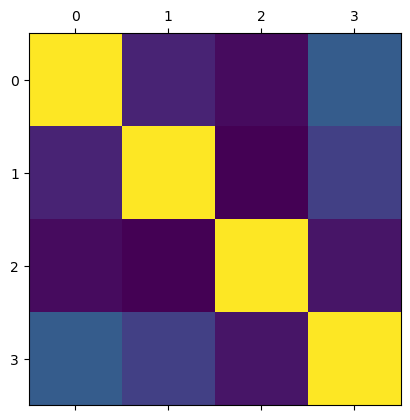

In [10]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_select.corr())
plt.show()

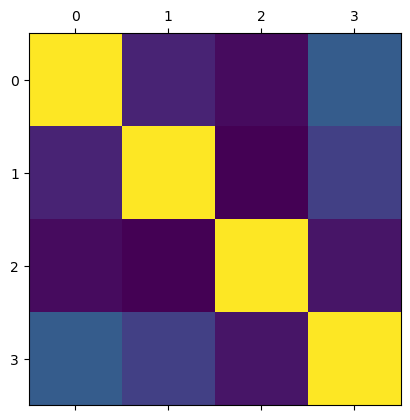

In [11]:
# Save figure
plt.matshow(df_select.corr())
plt.savefig("correlation_heatmap.png") 

Text(0.5, 1.0, 'Correlation Matrix')

<Figure size 800x800 with 0 Axes>

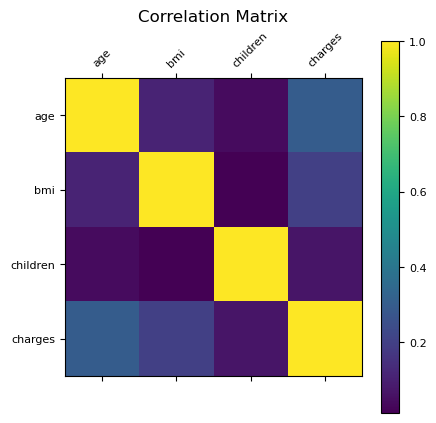

In [13]:
# Plot correlation matrix 
# Plot setup
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(corr_matrix, fignum=None) # type of plot
plt.xticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=8, rotation=45) # x axis labels
plt.yticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=8) # y axis labels

#setup layout
cb = plt.colorbar() # add a colour legend
cb.ax.tick_params(labelsize=8) # add font size
plt.title('Correlation Matrix', fontsize=12)

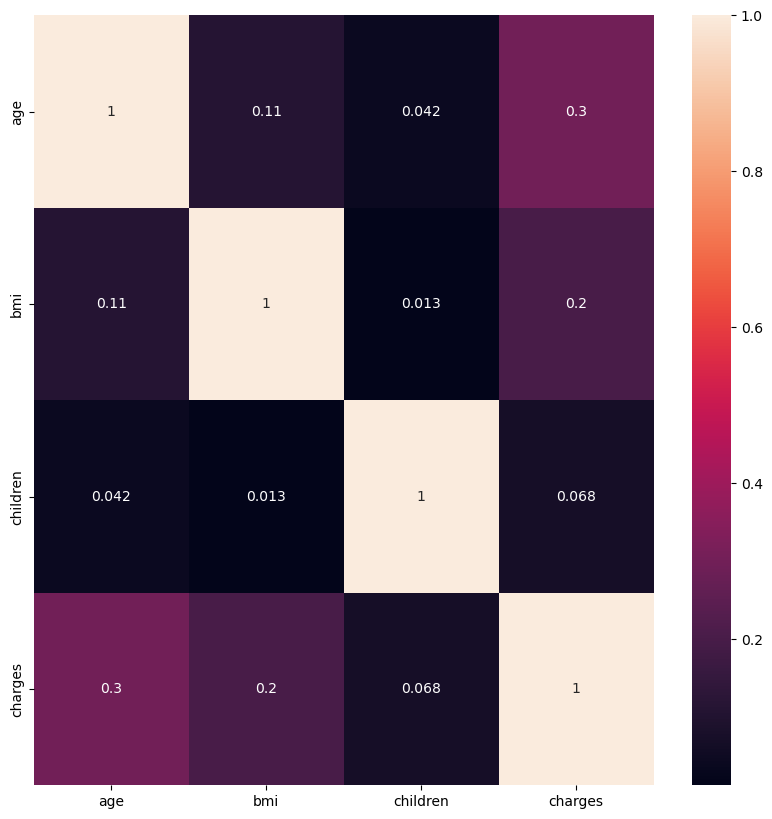

In [12]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_select.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

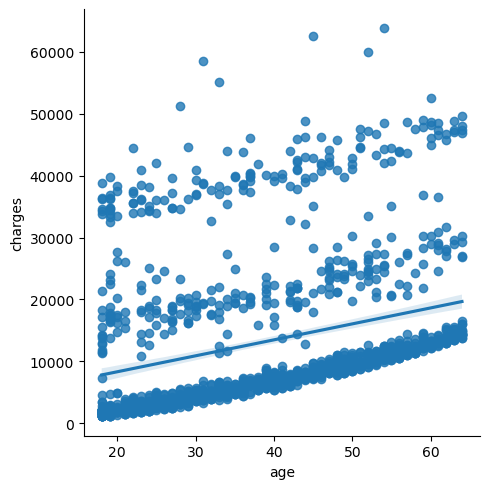

In [13]:
# Scatterplot
scat1 = sns.lmplot(x = 'age', y = 'charges', data = df_select)

In [17]:
# Pair Plots
# Keep only the variables you want to use in the pair plot
sub_2 = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]

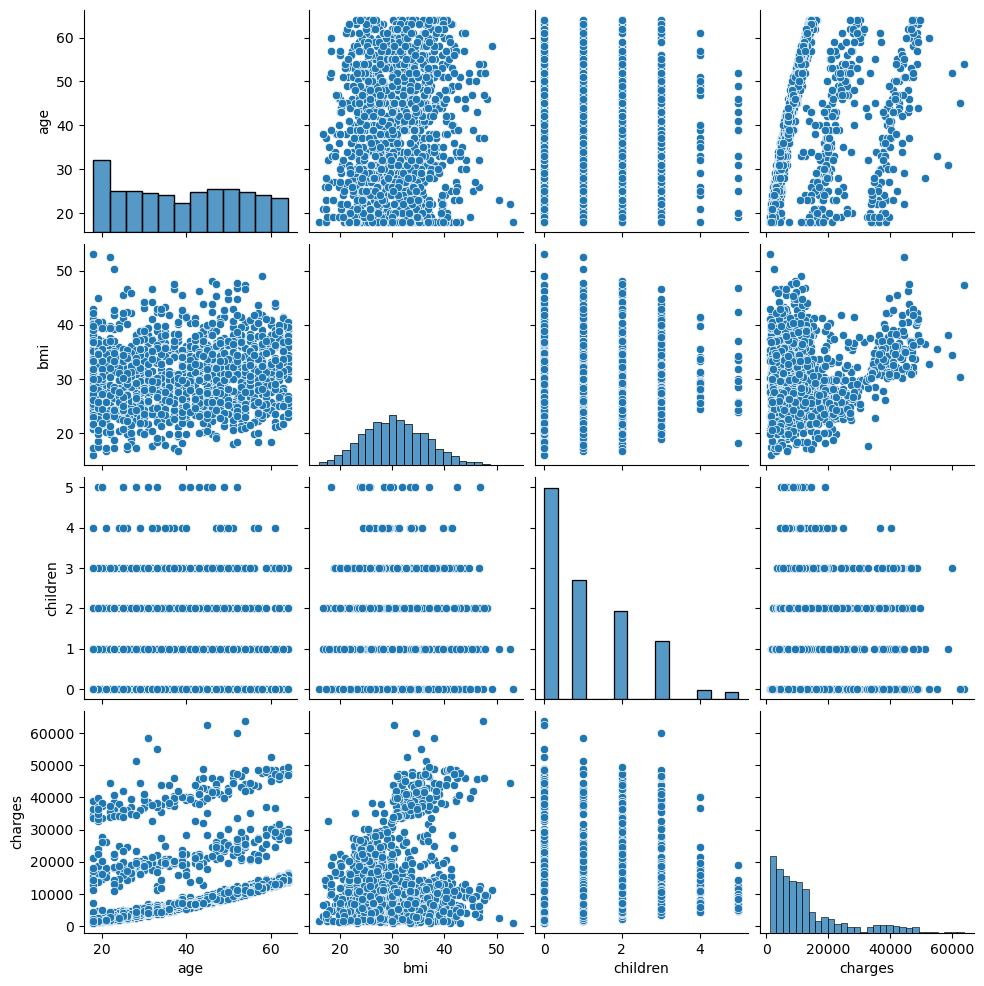

In [18]:
# Create a pair plot 
g = sns.pairplot(sub_2)

<Axes: xlabel='charges', ylabel='Count'>

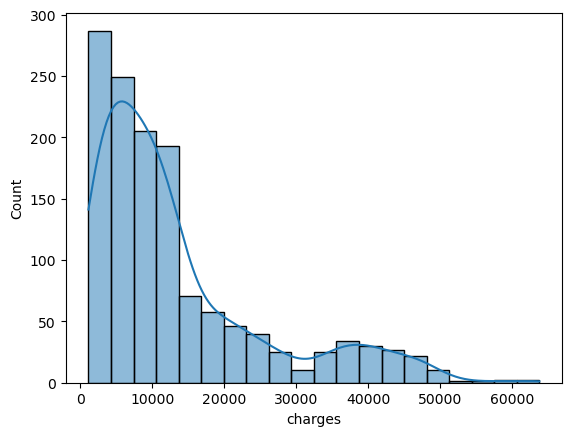

In [16]:
# Categorical Plots
sns.histplot(df_select['charges'], bins = 20, kde = True)

In [24]:
df_select['charges'].describe().round()

count     1338.0
mean     13270.0
std      12110.0
min       1122.0
25%       4740.0
50%       9382.0
75%      16640.0
max      63770.0
Name: charges, dtype: float64

#### **Question 3**
Discuss what the coefficients in the plot mean in terms of the relationships 
between the variables.
- Answer: The coefficient between age and charges is 0.3, indicating a moderate positive correlation. This shows that as insured individuals age, their medical charges tend to increase.
- The coefficient between BMI (Body Mass Index) and healthcare charges is 0.2, indicating a positive correlation. This shows that as BMI increases, healthcare charges tend to rise, demonstrating a relationship where higher BMIs are associated with greater healthcare expenses.
- The coefficient between the number of children and healthcare charges is 0.068, indicating a weak positive correlation. This shows that an increase in the number of children is associated with slightly higher healthcare charges, though the relationship is relatively weak.

#### **Question 4**
Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
Discuss the output in a markdown cell.
-Answer: The scatterplot illustrates a linear relationship, where as the age of the insured individual increases, so do the charges.

#### **Question 5**
Create a pair plot of the entire data set.
Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.
- Answer: The pair plot shows that the clusters are more concentrated around higher charges, indicating an upward trend.

#### **Question 6**
Create a categorical plot and interpret the results.
- Answer: The categorical plots indicate an increasing trend in charges.

 #### **Question 7**
 Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

•	How does the number of children or dependents influence individual medical charges?
- Answer: As the number of children increases, the associated charges also tend to rise.

•	What is the relationship between age and individual medical charges?
- Answer: As the age of insured individuals increases, the associated medical charges also tend to rise.

•	Are smoking rates higher in specific regions, and do these rates correlate with increased medical charges?
- Answer: Smoking rates vary across regions, and their correlation with increased medical charges can be analyzed. Regions with higher smoking rates may show a positive association with increased medical charges, reflecting the health risks and associated costs linked to smoking-related conditions.

•	Can individual medical charges be predicted based on a combination of variables such as age, BMI, and smoking status?
- Answer: Yes, individual medical charges can be predicted using a combination of variables such as age, BMI, and smoking status. These factors significantly influence medical expenses, with age and BMI often linked to health risks and smoking status contributing to higher medical costs due to associated health conditions. Machine learning models, such as linear regression, can be employed to analyze these variables and predict charges.

#### **Question 8**
Define any hypotheses that you can at this point. You’ll be testing these later on.
- Answer: 
- Age and Medical Charges: Older individuals are associated with higher medical charges, indicating age as a significant predictor of healthcare costs.
- Smoking and Regional Impact: Smoking prevalence varies by region and correlates with increased medical charges, suggesting regional patterns in health-related expenses.
- BMI and Costs: Higher BMI is linked to elevated medical charges, with a potential optimal BMI range associated with lower healthcare costs.